# Recurrent Neural Network(RNN)

**Purpose:** Designed for sequential data where the order of data points matters. 

## Key Features:

**Recurrent Connections:** Have loops that allow information to persist, making them suitable for time-dependent data.

**Types of RNN Cells:** Basic RNN, Long Short-Term Memory (LSTM), and Gated Recurrent Units (GRU) which address issues like vanishing gradients.

**Applications:** Natural language processing (NLP), speech recognition, time-series forecasting, and music generation.

**Examples:** LSTM, GRU, Seq2Seq.

# Importing Packages

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [3]:
# Data Preperation

In [4]:
## Loading the IMDB dataset

In [6]:
max_features = 10000 # Only consider the top 10,000 words in the dataset
maxlen = 200  # Cut reviews after 200 words

In [7]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
## Pad sequences to ensure each review has the same lenght

In [9]:
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [15]:
X_test.shape

(25000, 200)

In [16]:
# Building the RNN Model

In [17]:
model = Sequential([
    Embedding(input_dim = max_features, output_dim =32, input_length = maxlen),
    SimpleRNN(units=32, return_sequences = False),
    Dense(1, activation ='sigmoid')
])

C:\Users\furka\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
## Compiling the model

In [20]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [21]:
## Printting a summary of the model 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [37]:
history = model.fit(X_train, y_train, epochs = 10, batch_size =64, validation_split =0.2)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 1.0000 - loss: 6.2808e-04 - val_accuracy: 0.8755 - val_loss: 0.6005
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 1.0000 - loss: 4.8597e-04 - val_accuracy: 0.8755 - val_loss: 0.6161
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 1.0000 - loss: 3.8042e-04 - val_accuracy: 0.8752 - val_loss: 0.6311
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 1.0000 - loss: 2.9994e-04 - val_accuracy: 0.8747 - val_loss: 0.6430
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 1.0000 - loss: 2.4031e-04 - val_accuracy: 0.8752 - val_loss: 0.6546
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 1.0000 - loss: 1.9614e-04 - val_accuracy: 0.8740 - val_loss: 0.6659
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 1.0000 - loss: 1.5861e-04 - val_accuracy: 0.8729 - val_loss: 0.6770
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 1.00

# Evulating the model on the test set

In [38]:
test_loss, test_accuracy= model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8098 - loss: 1.0701
Test accuracy: 0.8139


## Plotting the training & validation accuracy values

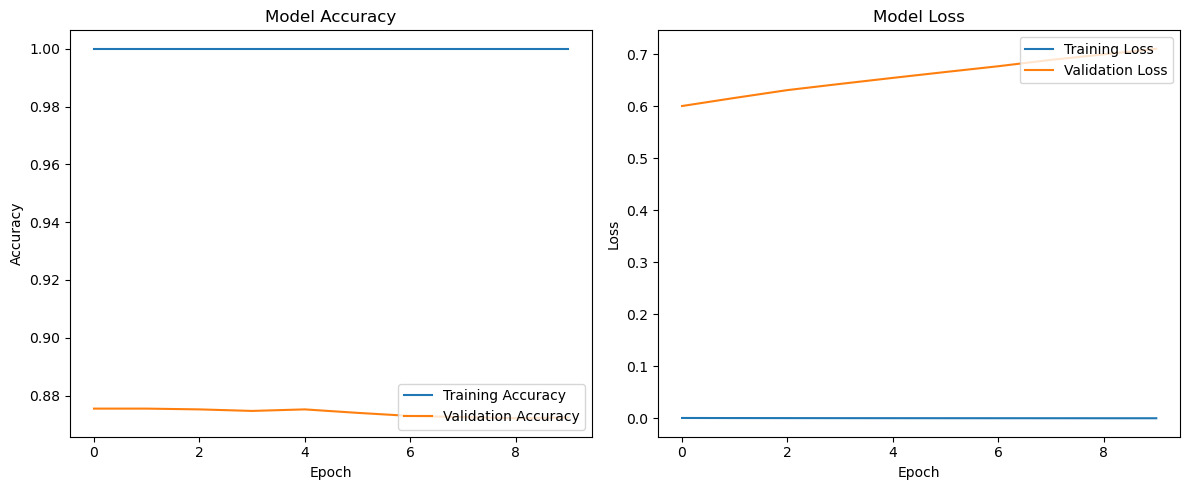

In [39]:
# Plot training & validation accuracy values 
plt.figure(figsize =(12,5))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc ='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()